In [1]:
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

#Load our data
df = pd.read_csv('time_series_covid19_confirmed_global.csv')

today = len(df.columns)-1
df = df.sort_values(df.columns[today], ascending = False)
df.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,429052,462780,496535,526396,555313,580619,607670,636350,667801,699706
201,NaN,Spain,40.0000,-4.0000,0,0,0,0,0,0,...,148220,153222,158273,163027,166831,170099,172541,177644,184948,190839
137,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,...,139422,143626,147577,152271,156363,159516,162488,165155,168941,172434
116,NaN,France,46.2276,2.2137,0,0,2,3,3,3,...,82048,86334,90676,93790,120633,124298,130253,133470,145960,147969
120,NaN,Germany,51.0000,9.0000,0,0,0,0,0,1,...,113296,118181,122171,124908,127854,130072,131359,134753,137698,141397
223,NaN,United Kingdom,55.3781,-3.4360,0,0,0,0,0,0,...,60733,65077,73758,78991,84279,88621,93873,98476,103093,108692
133,NaN,Iran,32.0000,53.0000,0,0,0,0,0,0,...,64586,66220,68192,70029,71686,73303,74877,76389,77995,79494
213,NaN,Turkey,38.9637,35.2433,0,0,0,0,0,0,...,38226,42282,47029,52167,56956,61049,65111,69392,74193,78546
62,Hubei,China,30.9756,112.2707,444,444,549,761,1058,1423,...,67803,67803,67803,67803,67803,67803,67803,67803,67803,68128
23,NaN,Belgium,50.8333,4.0000,0,0,0,0,0,0,...,23403,24983,26667,28018,29647,30589,31119,33573,34809,36138


In [2]:
#Sort by most recent day
today = len(df.columns)-1
df_top = df.sort_values(df.columns[today], ascending = False)

df.drop(['Lat','Long'], axis=1,inplace=True)

#-- Reformat
df_top = df_top.T
new_header = df_top.iloc[1] #grab the first row for the header
df_top = df_top[2:] #take the data less the header row
df_top.columns = new_header
#-----

#Top 10
df_top=df_top.iloc[:,0:10]

#Drop China for now
df_top.drop(columns='China',inplace=True)

#find chinese provences
dc1 = df.loc[df['Country/Region'] == 'China']
dc1.drop(['Country/Region'], axis=1,inplace=True)

dc_ex = dc1[dc1['Province/State'] != 'Hubei']
dc1 = dc1.append(dc_ex.sum(numeric_only=True),ignore_index=True)
dc1.at[33, 'Province/State'] = 'china_exl_hubei'

#sum the provinces as append/this is what we need
dc1 = dc1.append(dc1.sum(numeric_only=True),ignore_index=True)
dc1.at[34, 'Province/State'] = 'china_tot'

#This is what we needed
pos_china = dc1.iloc[[0,-1]]
                                          
today = len(dc1.columns)-1
dc_top = dc1.sort_values(dc1.columns[today], ascending = False).T
                     
new_header = dc_top.iloc[0] #grab the first row for the header
dc = dc_top[1:] #take the data less the header row
dc.columns = new_header
#---------
def nans(df): 
    return df[df.isnull().any(axis=1)]

pos_china = dc.reset_index()

pos_china= pos_china.T
new_header = pos_china.iloc[0] #grab the first row for the header
df_ch = pos_china[1:] #take the data less the header row
df_ch.columns = new_header
#df_ch.rename(columns={'Province/State': 'Country/Region','Daily_total':'China'}, inplace=True)
df_ch

df_ch = df_ch.iloc[0]

df = nans(df)
df.drop(['Province/State'], axis=1,inplace=True)

#add china
df = df.append(df_ch,ignore_index=True)
df.at[172, 'Country/Region'] = 'China'

df_top = df.sort_values(df.columns[today], ascending = False)

df10 = df_top.T

new_header = df10.iloc[0] #grab the first row for the header
df_top = df10[1:] #take the data less the header row
df_top.columns = new_header
df_top=df_top.iloc[:,0:10]

pos=df.sum(axis=0)
pos=pos[1:]

dft = df.T
new_header = dft.iloc[0] #grab the first row for the header
df_t = dft[1:] #take the data less the header row
df_t.columns = new_header
#df_t.reset_index(inplace=True)
df_t.insert(0, 'Worldwide', pos)
#df_t.reset_index(inplace=True)
df = df_t

/Users/ericoliverio/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


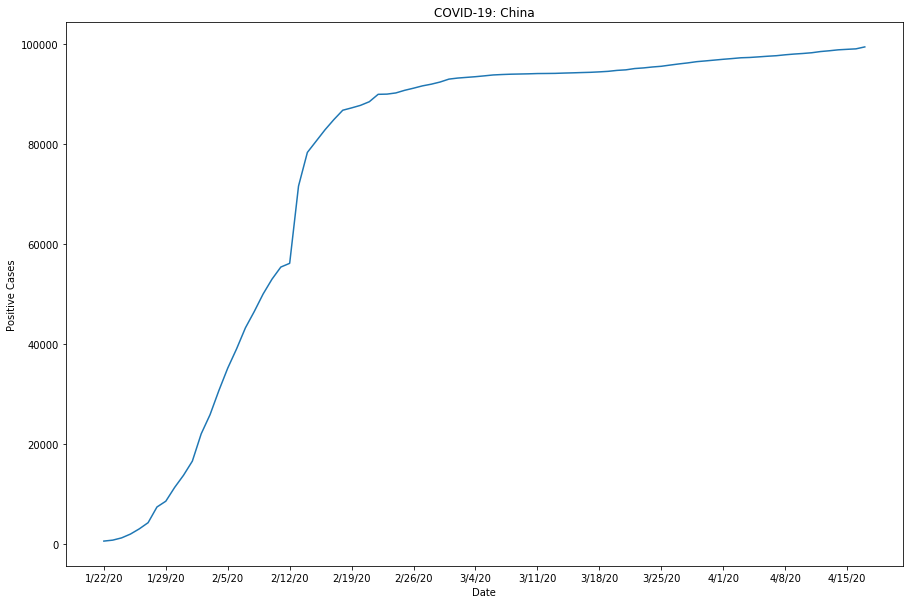

In [7]:
plt.figure(figsize=(15,10))

plt.plot(dc.index,dc.china_tot)

plt.title('COVID-19: China')
plt.ylabel('Positive Cases')
plt.xlabel('Date')

ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))

plt.show()

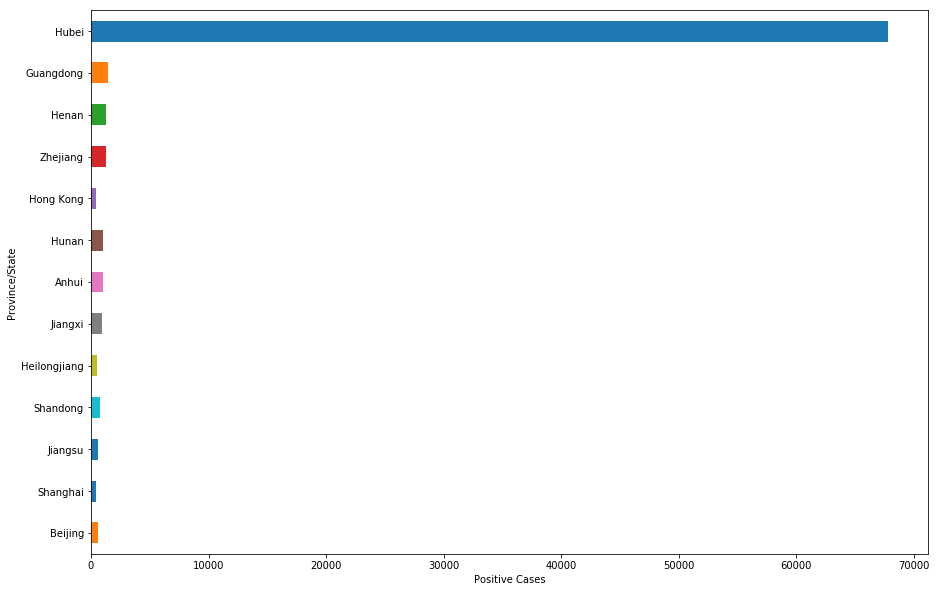

In [4]:
#Bar graph
dc_10=dc.iloc[:,0:15]

dc10 = dc_10.drop(columns=['china_tot','china_exl_hubei'])
dc10 = dc10.T['3/26/20']

plt.figure(figsize=(15,10))
ax = dc10.plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('Positive Cases')
plt.show()

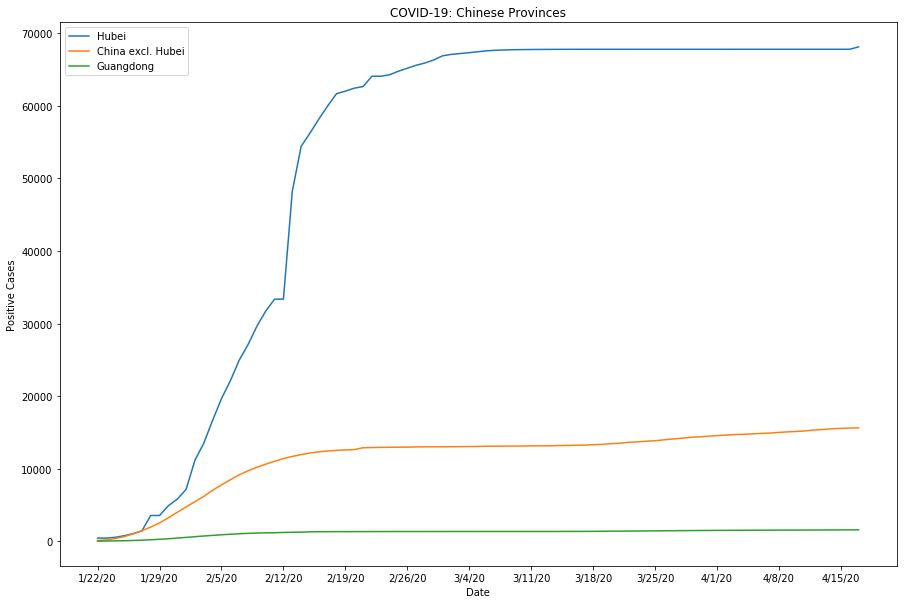

In [5]:
plt.figure(figsize=(15,10))

plt.plot(dc.index,dc.Hubei,label='Hubei')
plt.plot(dc.index,dc.china_exl_hubei,label='China excl. Hubei')
plt.plot(dc.index,dc.Guangdong,label='Guangdong')

plt.title('COVID-19: Chinese Provinces')
plt.ylabel('Positive Cases')
plt.xlabel('Date')

ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
leg = plt.legend();
plt.show()

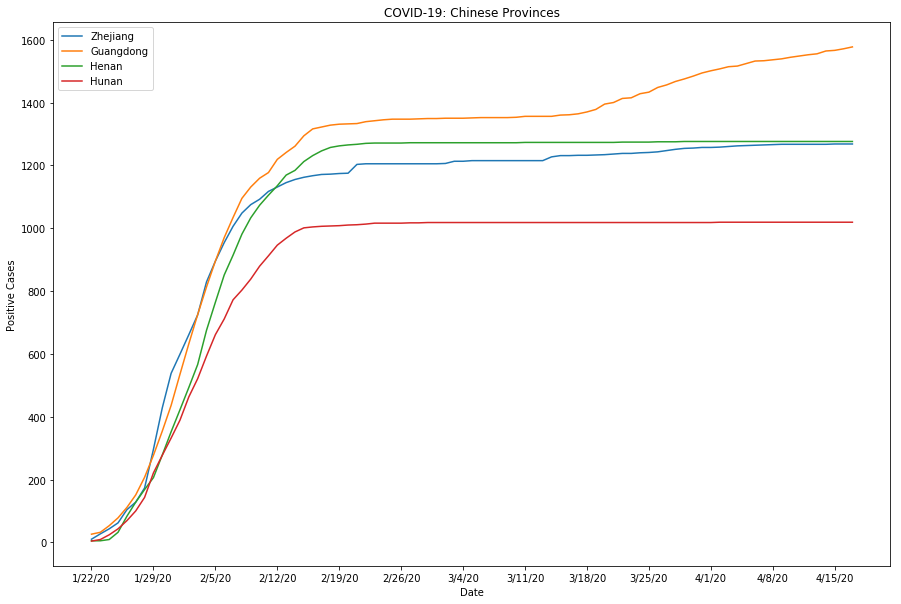

In [6]:
plt.figure(figsize=(15,10))

plt.plot(dc.index,dc.Zhejiang,label='Zhejiang')
plt.plot(dc.index,dc.Guangdong,label='Guangdong')
plt.plot(dc.index,dc.Henan,label='Henan')
plt.plot(dc.index,dc.Hunan,label='Hunan')

plt.title('COVID-19: Chinese Provinces')
plt.ylabel('Positive Cases')
plt.xlabel('Date')

ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
leg = plt.legend();
plt.show()